In [1]:
%%capture
%run ./read_data.ipynb

https://www.kaggle.com/code/thanhhuynh/linear-regression-and-regularization-ford

### Elastic Net Regression Model

In [2]:
from sklearn.linear_model import ElasticNet

In [4]:
en = ElasticNet()
en.fit(X_train, y_train)


ElasticNet()

In [5]:
en.coef_

array([-1.13051427e+03,  3.73201350e+02, -1.73522588e+03,  1.91784302e+03,
       -1.53922186e+03,  3.80882640e+00,  1.31444167e+02,  8.28719187e+01,
       -3.87652620e+01, -1.18320012e+00, -5.63135315e+02, -7.23141601e+01,
        3.18371679e+01,  6.32541520e+01,  2.49740898e+02,  3.54670503e+02,
        9.86356185e+01,  8.06717398e+01, -4.25537536e+02,  2.68977088e+02,
       -6.77691355e+02,  4.07715241e+02,  3.90972247e+02, -3.90967415e+02])

In [6]:
train_test_report(en)

Train score: 		         0.8201
Test score: 		         0.8161


<Figure size 432x288 with 0 Axes>

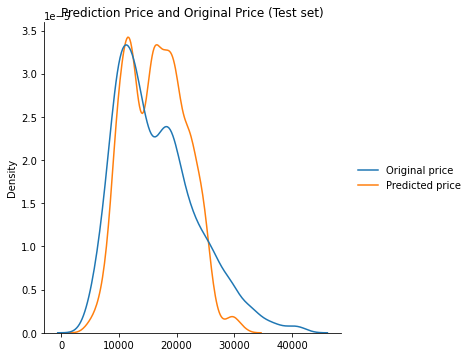

In [7]:
plot_prediction_compare_ori(en, title='Prediction Price and Original Price (Test set)')

<Figure size 432x288 with 0 Axes>

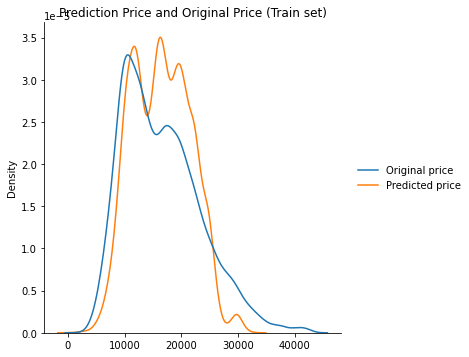

In [8]:
plot_prediction_compare_ori(en, X_train, y_train, title='Prediction Price and Original Price (Train set)')

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import pandas as pd
parameters={
    'alpha':[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'l1_ratio':np.arange(0.0,1.0,0.1),
    'normalize':[True, False]
}

In [10]:
tuned_en = GridSearchCV(en, parameters,scoring='r2',cv=5)
tuned_en.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62614422848.35217, tolerance: 39138914.13079114
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62892515673.40331, tolerance: 39401503.43948791
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62980532781.555756, tolerance: 39508175.89226847
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'normalize': [True, False]},
             scoring='r2')

Text(0, 0.5, 'Predicted Price')

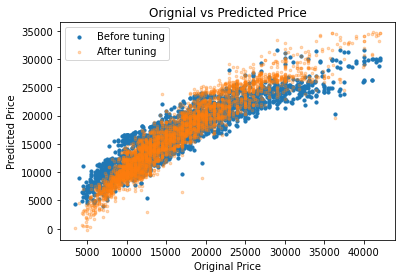

In [11]:
import matplotlib.pyplot as plt
y_predict = en.predict(X_test)
df = pd.DataFrame({'Original price':y_test, 'Predicted price':y_predict})
plt.scatter(df['Original price'], df['Predicted price'],s=10)

y_predict = tuned_en.predict(X_test)
df = pd.DataFrame({'Original price':y_test, 'Predicted price':y_predict})
plt.scatter(df['Original price'], df['Predicted price'],alpha=0.3,s=7)

plt.title('Orignial vs Predicted Price')
plt.legend(['Before tuning', 'After tuning'])
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')

<Figure size 432x288 with 0 Axes>

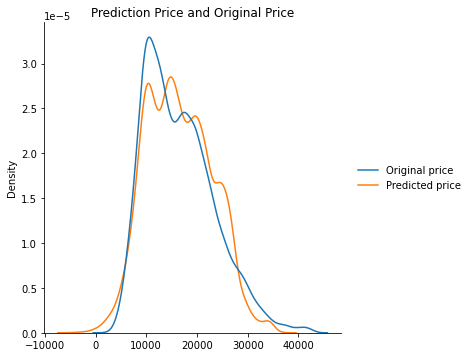

In [12]:
plot_prediction_compare_ori(tuned_en, X_train, y_train)

In [13]:
train_test_report(tuned_en)

Train score: 		         0.8937
Test score: 		         0.8939


In [14]:
gs_report(tuned_en)

Best score: 			         0.8929
Best parameters: 		{'alpha': 0.001, 'l1_ratio': 0.7000000000000001, 'normalize': False}
Best estimator: 		ElasticNet(alpha=0.001, l1_ratio=0.7000000000000001)


In [15]:
cross_val_score(en, X, y, cv=5).mean()

0.7813163291355051

In [16]:
cross_val_score(tuned_en, X, y, cv=5).mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71347450940.67772, tolerance: 47609747.54540377
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74612634314.79465, tolerance: 47769693.99622206
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80139320186.87704, tolerance: 48164150.41966826
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: O

KeyboardInterrupt: 

In [ ]:
regression_report_compare_model(en, tuned_en)

Before tuning hyperparameter: 

Accuracy score: 			         0.8162
R-squared score: 			         0.8161
Mean Absolute Error(MAE): 		      2207.4181
Mean Squared Error (MSE): 		   8918350.7300
Root Mean Squared Error (RSME): 	      2986.3608
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.8939
R-squared score: 			         0.8939
Mean Absolute Error(MAE): 		      1697.7129
Mean Squared Error (MSE): 		   5147379.6249
Root Mean Squared Error (RSME): 	      2268.7837


In [ ]:
# new_en.coef_
tuned_en.best_estimator_.coef_

array([-1389.70722626,  -834.2533891 , -1812.05473375,  2838.52067084,
       -2333.83729454,   563.18776872,  2608.88124152,  -562.60302244,
       -1886.29659549,  -582.29819857, -2192.01429232, -2562.9988407 ,
         530.40577054,  1179.48364161,  1854.63289593,  1730.21565548,
        1490.72788335,  1767.01108624, -3942.78064012,   493.98950366,
        -887.19425993,   388.96875863,  -355.72550058,   298.78526241])

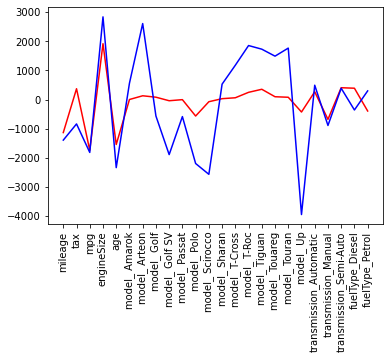

In [ ]:
plt.plot(X_train.columns,en.coef_,color='red')
plt.plot(X_train.columns,tuned_en.best_estimator_.coef_,color='blue')
plt.xticks(rotation=90)
plt.show()